In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, glob
from datetime import datetime

In [81]:
import matplotlib
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [82]:
xls = pd.read_excel('KoreanTiadal20110311Daily.xlsx', sheet_name='3월11일 울릉도', header=None)
xls

0  1    2
0                00:00:00 -7  NaN
1                00:01:00 -7  NaN
2                00:02:00 -6  NaN
3                00:03:00 -7  NaN
4                00:04:00 -6  NaN
...                   ... ..  ...
1436             23:56:00 -1  9.0
1437             23:57:00 -1  8.0
1438             23:58:00 -1  6.0
1439             23:59:00  0  6.0
1440  1900-01-01 00:00:00 -1  4.0

[1441 rows x 3 columns]

In [83]:
file_list = glob.glob(os.path.join('./KoreanTidal201103/','*.csv'))
file_list

['./KoreanTidal201103\\조위관측소자료_묵호_201103010000_201103312359.csv',
 './KoreanTidal201103\\조위관측소자료_속초_201103010000_201103312359.csv',
 './KoreanTidal201103\\조위관측소자료_왕돌초_201103010000_201103312359.csv',
 './KoreanTidal201103\\조위관측소자료_울릉도_201103010000_201103312359.csv',
 './KoreanTidal201103\\조위관측소자료_후포_201103010000_201103312359.csv']

In [132]:
all_df = pd.DataFrame()
all_stats = pd.DataFrame()

for idx, f in enumerate(file_list):
    measure_loc = f.split('\\')[-1].split('_')[1]
    df = pd.read_csv(f, encoding='cp949', skiprows=7).dropna(axis=1)
    df['관측시간'] = pd.to_datetime(df['관측시간'])
    df = df.iloc[:, 1:3]
    cols = list(df.columns)
    cols[-1] = cols[-1] + '_' + measure_loc
    df.columns = cols
    df_c = df.set_index(['관측시간'])

    mean_df =  pd.DataFrame(df_c.resample('D')[cols[-1]].agg(np.mean).fillna(0))

    meancols = list(mean_df.columns)
    meancols[-1] = meancols[-1] + '_' + 'mean'
    mean_df.columns = meancols

    max_df =  pd.DataFrame(df_c.resample('D')[cols[-1]].agg(np.max).fillna(0))
    maxcols = list(max_df.columns)
    maxcols[-1] = maxcols[-1] + '_' + 'max'
    max_df.columns = maxcols

    min_df =  pd.DataFrame(df_c.resample('D')[cols[-1]].agg(np.min).fillna(0))
    mincols = list(min_df.columns)
    mincols[-1] = mincols[-1] + '_' + 'min'
    min_df.columns = mincols

    day_df = pd.concat([mean_df, max_df, min_df], axis=1)

    df = df[(df['관측시간'] >='2011-03-04') & (df['관측시간'] < '2011-03-19')]

    if idx == 0:
        all_df = df
        all_stats = day_df

    else:
        all_df = pd.merge(left=all_df, right=df, how='inner', on='관측시간')
        all_stats = pd.concat([all_stats, day_df], axis=1)


In [133]:
all_df = all_df.set_index(['관측시간'])
all_df

OTT 조위(cm)_묵호  OTT 조위(cm)_속초  MIROS 조위(cm)_왕돌초  \
관측시간                                                                  
2011-03-04 00:00:00              4             15               202   
2011-03-04 00:01:00              4             15               202   
2011-03-04 00:02:00              3             19               201   
2011-03-04 00:03:00              2             15               203   
2011-03-04 00:04:00              4             15               200   
...                            ...            ...               ...   
2011-03-18 23:55:00              8             17               203   
2011-03-18 23:56:00              8             19               199   
2011-03-18 23:57:00              8             21               201   
2011-03-18 23:58:00              7             21               199   
2011-03-18 23:59:00              9             19               201   

                     OTT 조위(cm)_울릉도  OTT 조위(cm)_후포  
관측시간                                                
2011-03-04 00:00:00               5              2  
2011-03-04 00:01:00               6              4  
2011-03-04 00:02:00               5              4  
2011-03-04 00:03:00               6             -1  
2011-03-04 00:04:00               4              0  
...                             ...            ...  
2011-03-18 23:55:00               8             -4  
2011-03-18 23:56:00               7             -3  
2011-03-18 23:57:00               5             -2  
2011-03-18 23:58:00               6             -3  
2011-03-18 23:59:00               8             -2  

[19665 rows x 5 columns]

[None, None, None, None, None]

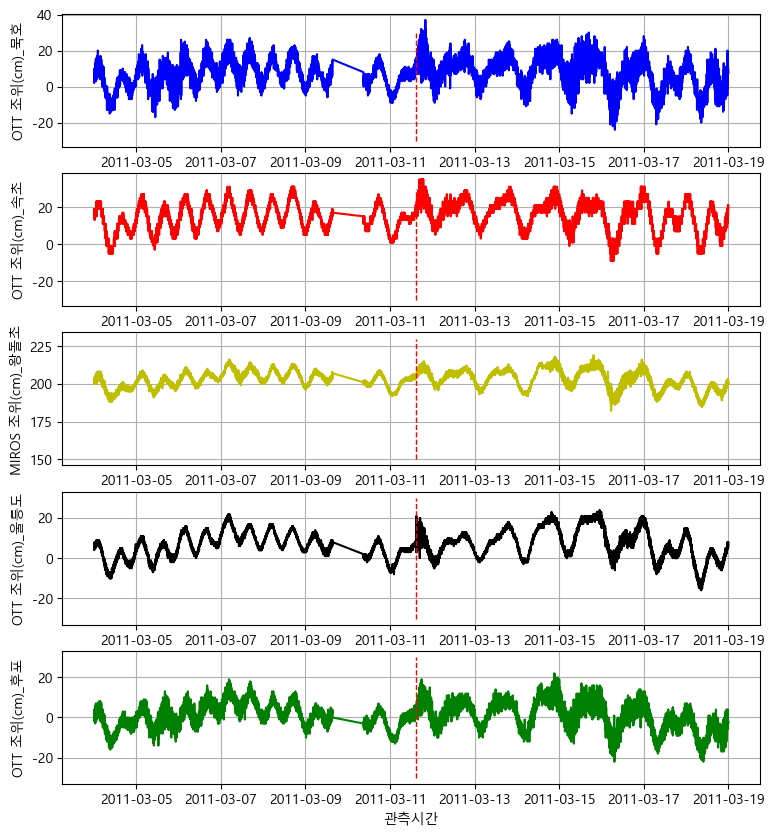

In [134]:
fig, ax = plt.subplots(5,1,figsize=(9, 10))
colors = ['b', 'r', 'y', 'k', 'g']
[sns.lineplot(ax=ax[i], data=all_df, x=all_df.index, y=all_df.columns[i], c=c) for i, c in enumerate(colors)]

ax[0].vlines(x=['2011-03-11 14:46'], ymin=-30, ymax=30, colors='red', ls='--', lw=1)
ax[1].vlines(x=['2011-03-11 14:46'], ymin=-30, ymax=30, colors='red', ls='--', lw=1)
ax[2].vlines(x=['2011-03-11 14:46'], ymin= 150, ymax=230, colors='red', ls='--', lw=1)
ax[3].vlines(x=['2011-03-11 14:46'], ymin=-30, ymax=30, colors='red', ls='--', lw=1)
ax[4].vlines(x=['2011-03-11 14:46'], ymin=-30, ymax=30, colors='red', ls='--', lw=1)

[ax[a].grid() for a in range(len(ax))]

<AxesSubplot:>

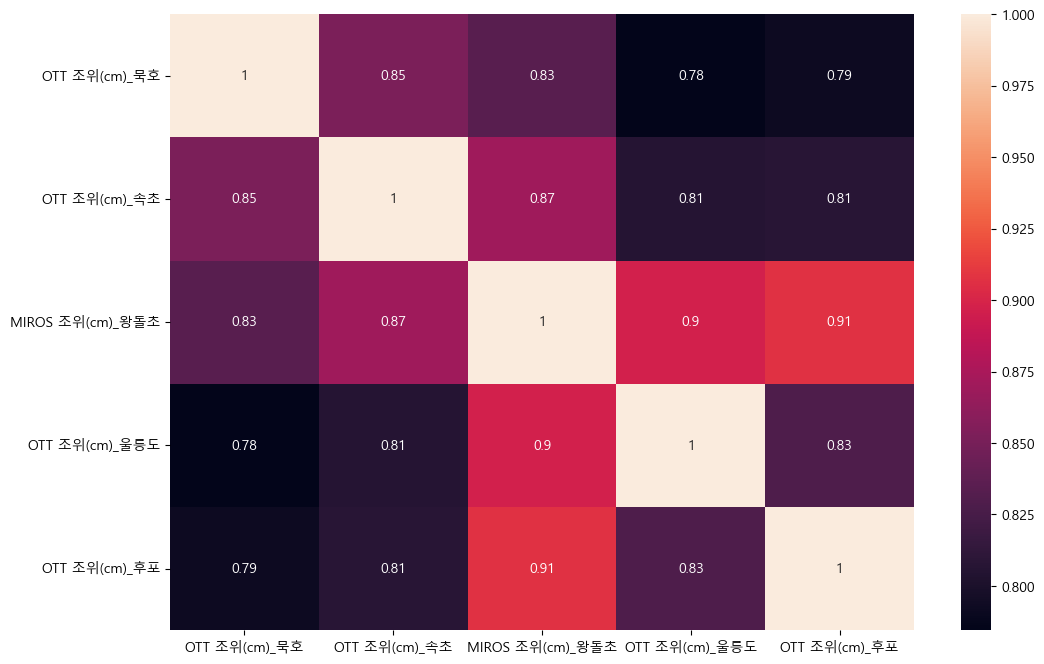

In [135]:
sns.heatmap(all_df.corr(),annot=True)

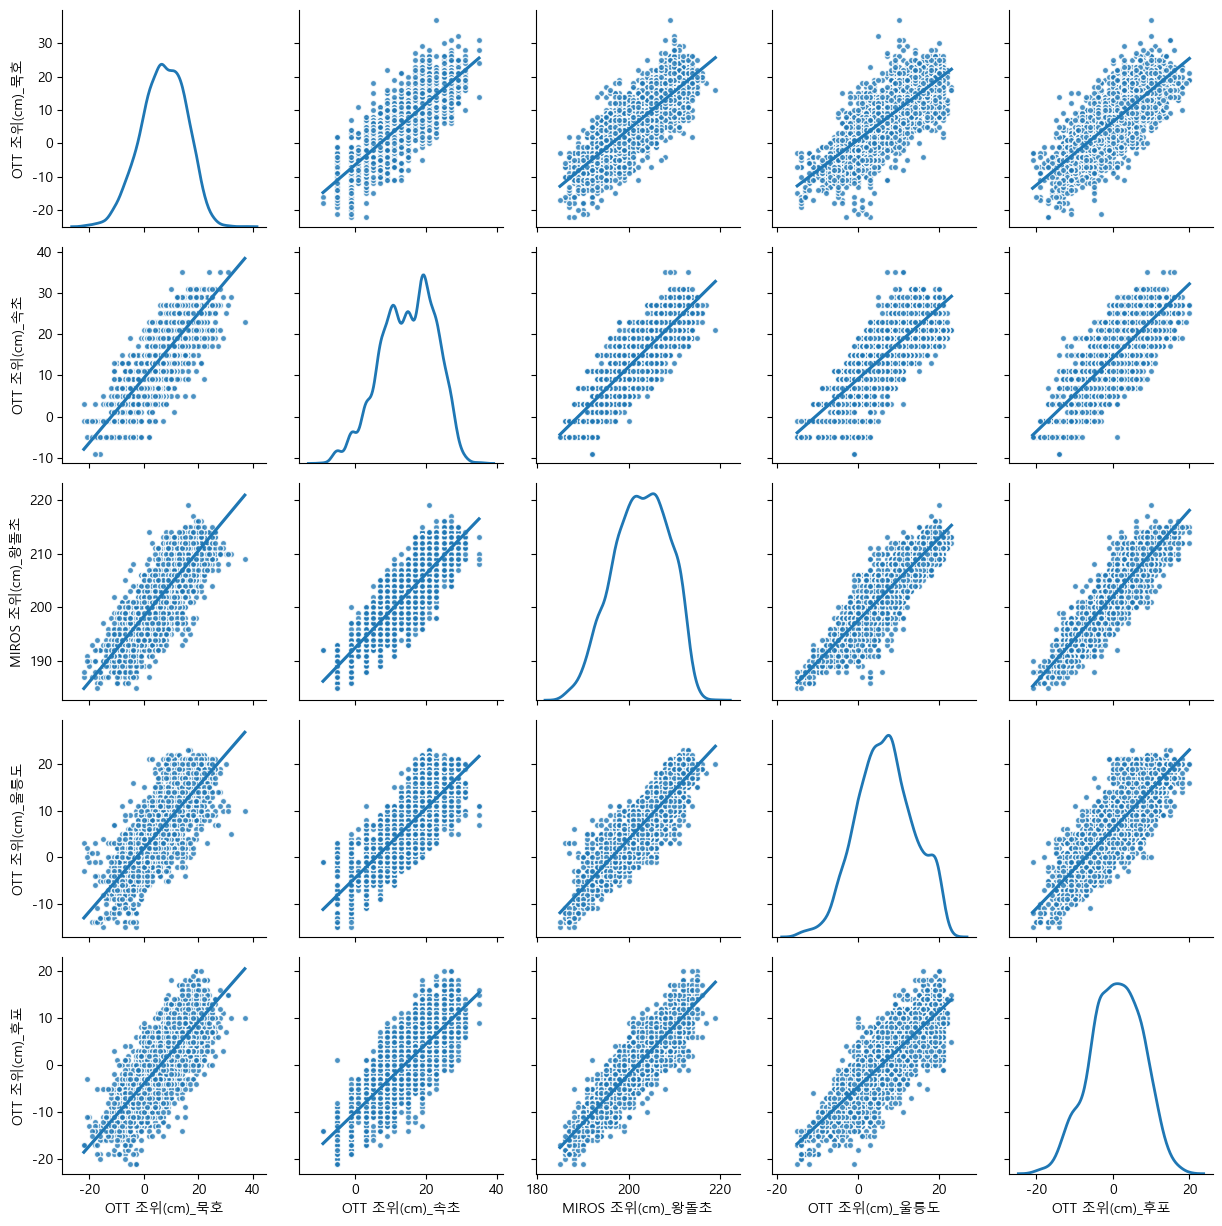

In [145]:
g = sns.PairGrid(all_df.sample(n=5000, random_state=1004))

g.map_upper(sns.regplot, scatter_kws=dict(linewidth=1, ec='white', s=20))
g.map_lower(sns.regplot, scatter_kws=dict(linewidth=1, ec='white', s=20))

g.map_diag(sns.kdeplot, lw=2)

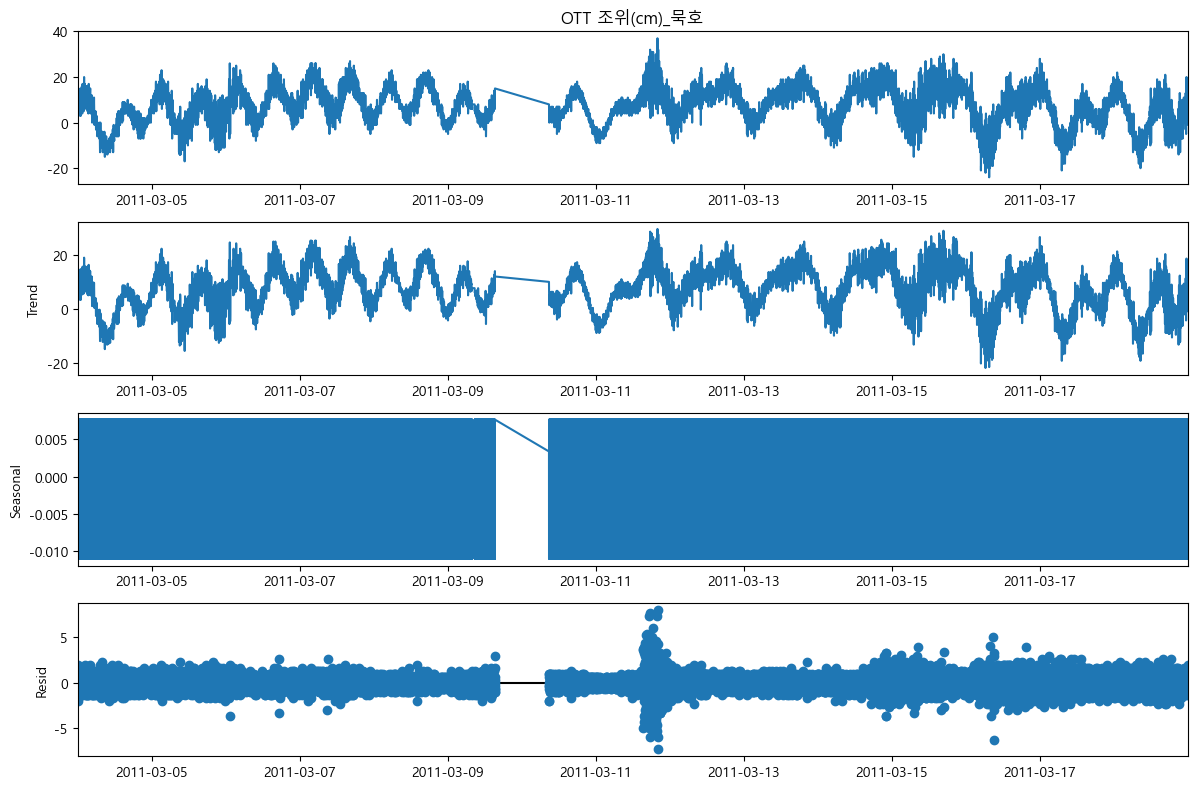

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts = all_df['OTT 조위(cm)_묵호']
result = seasonal_decompose(ts, model='additive',extrapolate_trend='freq', period=3)

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

array([<AxesSubplot:xlabel='관측시간'>, <AxesSubplot:xlabel='관측시간'>,
       <AxesSubplot:xlabel='관측시간'>, <AxesSubplot:xlabel='관측시간'>,
       <AxesSubplot:xlabel='관측시간'>], dtype=object)

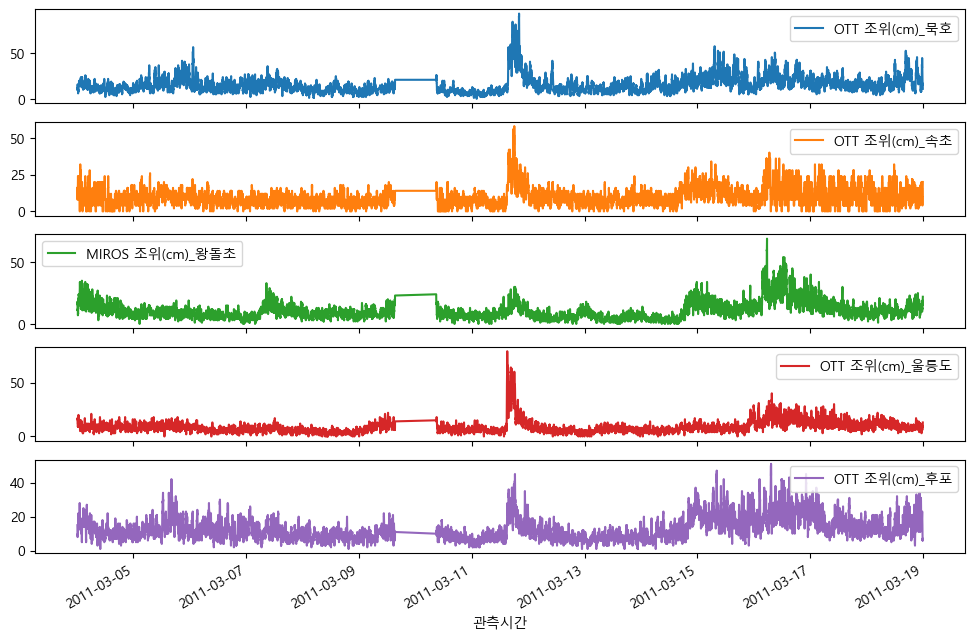

In [137]:
all_df_shift = all_df.shift(-1)

diff_df = abs(all_df - all_df_shift)

diff_rolling_sum = diff_df.rolling(window=11).sum()
diff_rolling_sum.plot(subplots=True)


In [138]:
diff_rolling_sum

OTT 조위(cm)_묵호  OTT 조위(cm)_속초  MIROS 조위(cm)_왕돌초  \
관측시간                                                                  
2011-03-04 00:00:00            NaN            NaN               NaN   
2011-03-04 00:01:00            NaN            NaN               NaN   
2011-03-04 00:02:00            NaN            NaN               NaN   
2011-03-04 00:03:00            NaN            NaN               NaN   
2011-03-04 00:04:00            NaN            NaN               NaN   
...                            ...            ...               ...   
2011-03-18 23:55:00           17.0           16.0              19.0   
2011-03-18 23:56:00           16.0           18.0              20.0   
2011-03-18 23:57:00           13.0           18.0              21.0   
2011-03-18 23:58:00           11.0           20.0              22.0   
2011-03-18 23:59:00            NaN            NaN               NaN   

                     OTT 조위(cm)_울릉도  OTT 조위(cm)_후포  
관측시간                                                
2011-03-04 00:00:00             NaN            NaN  
2011-03-04 00:01:00             NaN            NaN  
2011-03-04 00:02:00             NaN            NaN  
2011-03-04 00:03:00             NaN            NaN  
2011-03-04 00:04:00             NaN            NaN  
...                             ...            ...  
2011-03-18 23:55:00            10.0            6.0  
2011-03-18 23:56:00            12.0            6.0  
2011-03-18 23:57:00            12.0            7.0  
2011-03-18 23:58:00            13.0            7.0  
2011-03-18 23:59:00             NaN            NaN  

[19665 rows x 5 columns]

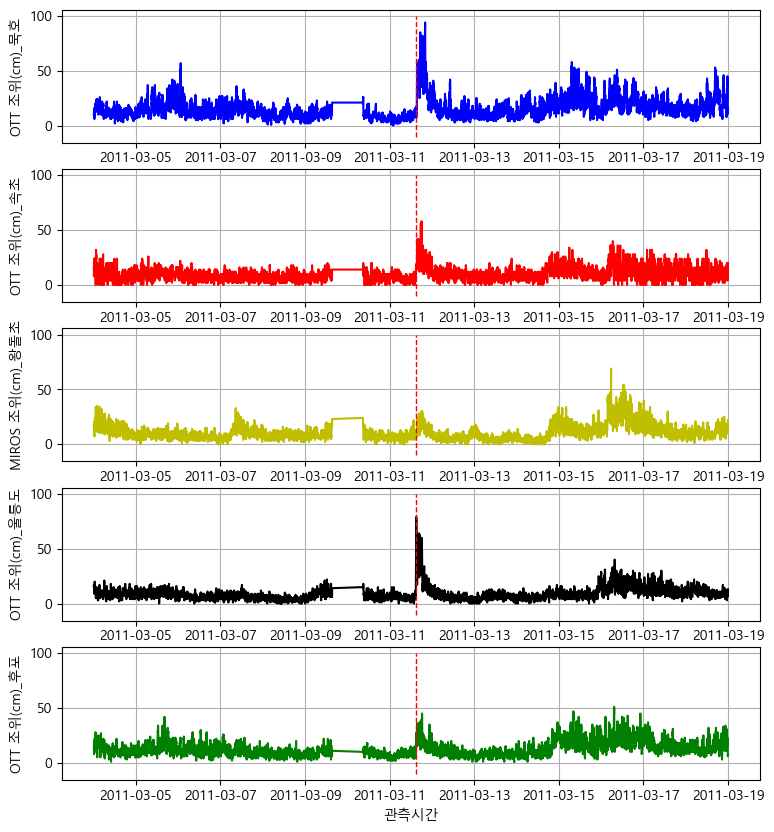

In [139]:
fig, ax = plt.subplots(5,1,figsize=(9, 10))


colors = ['b', 'r', 'y', 'k', 'g']

[sns.lineplot(ax=ax[i], data=diff_rolling_sum, x=diff_rolling_sum.index, y=diff_rolling_sum.columns[i], c=c) for i, c in enumerate(colors)]


[ax[a].grid() for a in range(len(ax))]



ax[0].vlines(x=['2011-03-11 14:46'], ymin=-10, ymax=100, colors='red', ls='--', lw=1)
ax[1].vlines(x=['2011-03-11 14:46'], ymin=-10, ymax=100, colors='red', ls='--', lw=1)
ax[2].vlines(x=['2011-03-11 14:46'], ymin=-10, ymax=100, colors='red', ls='--', lw=1)
ax[3].vlines(x=['2011-03-11 14:46'], ymin=-10, ymax=100, colors='red', ls='--', lw=1)
ax[4].vlines(x=['2011-03-11 14:46'], ymin=-10, ymax=100, colors='red', ls='--', lw=1)


<AxesSubplot:>

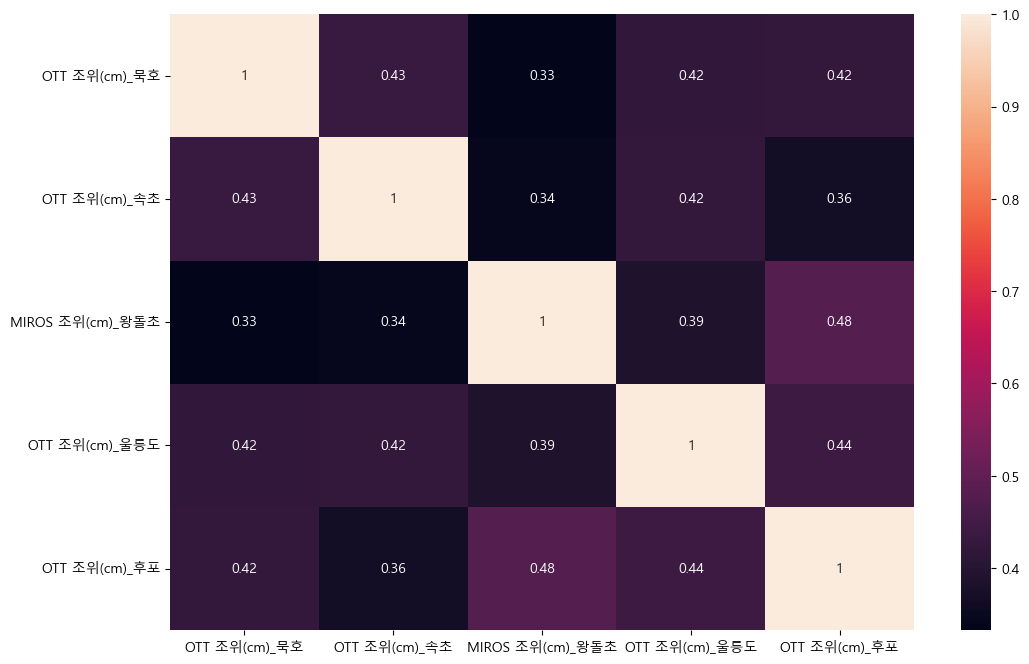

In [140]:
sns.heatmap(diff_rolling_sum.corr(),annot=True)

In [146]:
diff_rolling_sum = diff_rolling_sum.dropna(axis=0)
diff_rolling_sum

OTT 조위(cm)_묵호  OTT 조위(cm)_속초  MIROS 조위(cm)_왕돌초  \
관측시간                                                                  
2011-03-04 00:11:00           10.0           16.0              16.0   
2011-03-04 00:12:00           11.0           16.0              18.0   
2011-03-04 00:13:00           12.0           12.0              17.0   
2011-03-04 00:14:00           11.0            8.0              16.0   
2011-03-04 00:15:00           11.0           10.0              13.0   
...                            ...            ...               ...   
2011-03-18 23:54:00           17.0           16.0              15.0   
2011-03-18 23:55:00           17.0           16.0              19.0   
2011-03-18 23:56:00           16.0           18.0              20.0   
2011-03-18 23:57:00           13.0           18.0              21.0   
2011-03-18 23:58:00           11.0           20.0              22.0   

                     OTT 조위(cm)_울릉도  OTT 조위(cm)_후포  
관측시간                                                
2011-03-04 00:11:00            16.0           15.0  
2011-03-04 00:12:00            17.0           13.0  
2011-03-04 00:13:00            16.0           14.0  
2011-03-04 00:14:00            16.0           10.0  
2011-03-04 00:15:00            14.0            9.0  
...                             ...            ...  
2011-03-18 23:54:00            10.0            6.0  
2011-03-18 23:55:00            10.0            6.0  
2011-03-18 23:56:00            12.0            6.0  
2011-03-18 23:57:00            12.0            7.0  
2011-03-18 23:58:00            13.0            7.0  

[19654 rows x 5 columns]

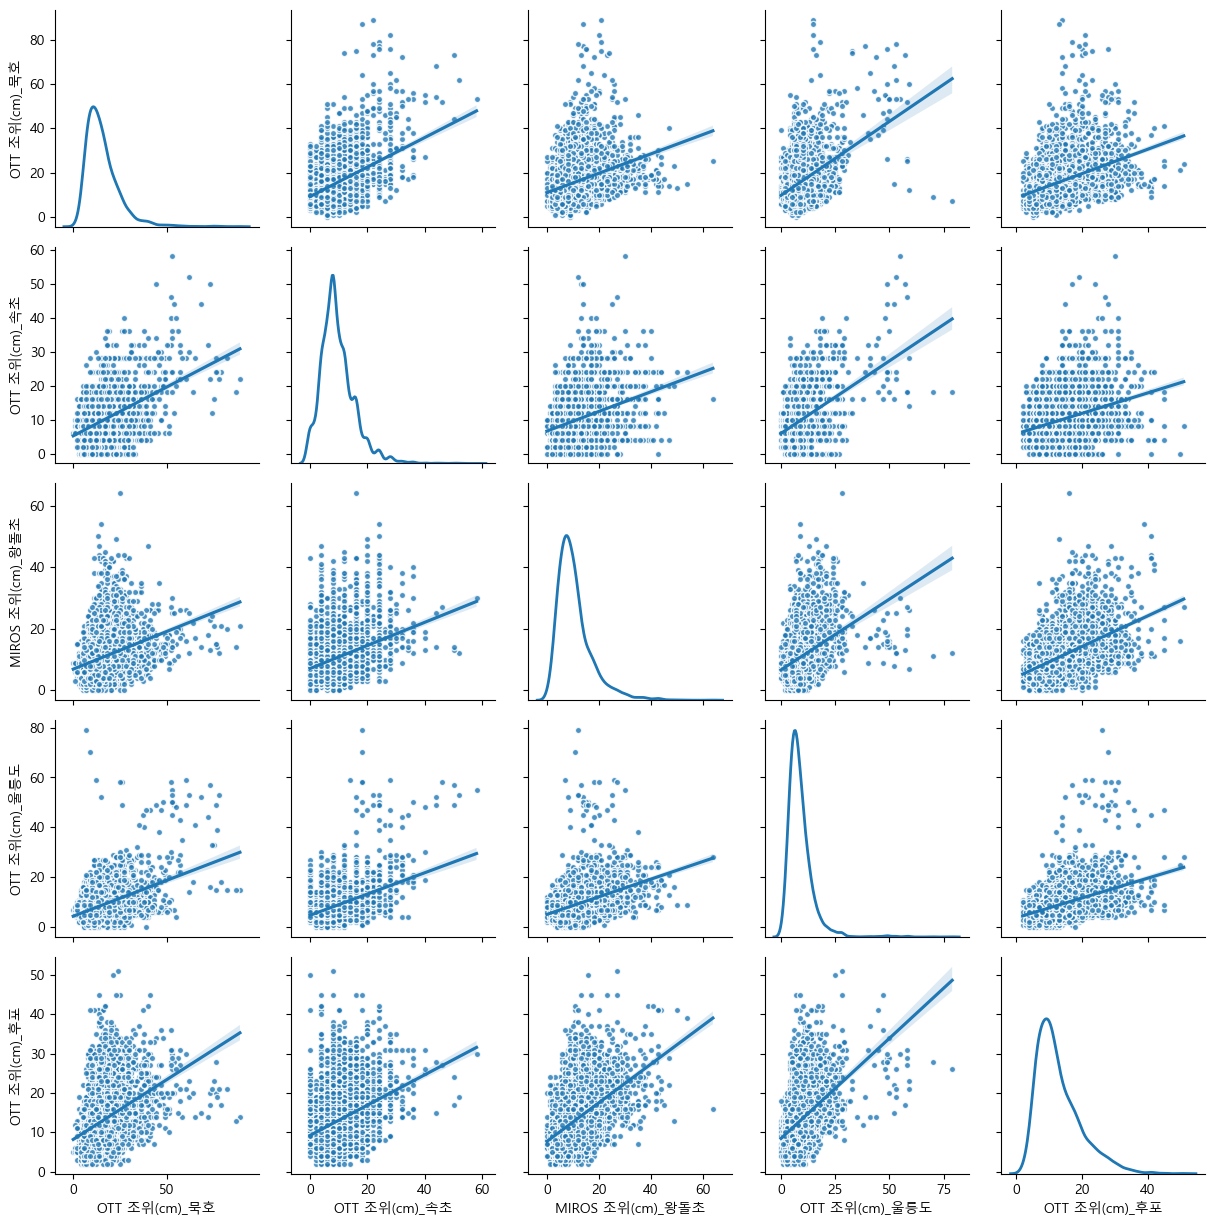

In [147]:
g = sns.PairGrid(diff_rolling_sum.sample(n=5000, random_state=1004))

g.map_upper(sns.regplot, scatter_kws=dict(linewidth=1, ec='white', s=20))
g.map_lower(sns.regplot, scatter_kws=dict(linewidth=1, ec='white', s=20))

g.map_diag(sns.kdeplot, lw=2)

# 일별 조위 Mean, Max, Min 그래프

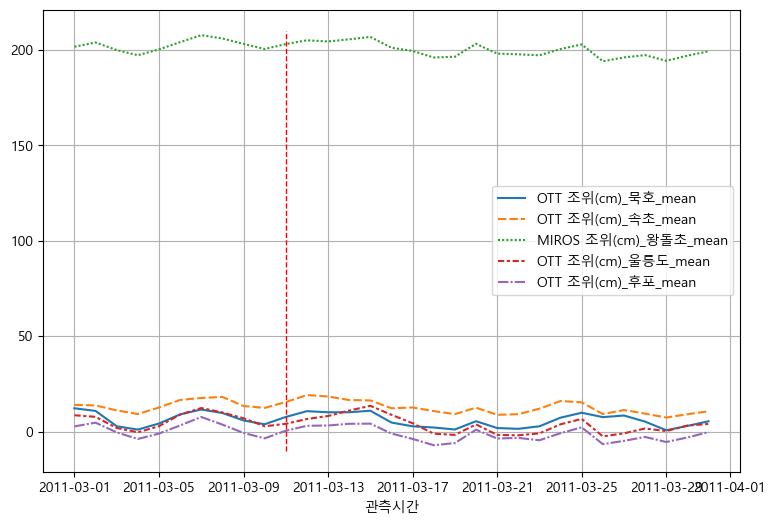

In [141]:

fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=all_stats.iloc[:, 0::3], ax=ax)

ax.vlines(x=['2011-03-11'], ymin=-10, ymax=210, colors='red', ls='--', lw=1)
ax.grid()

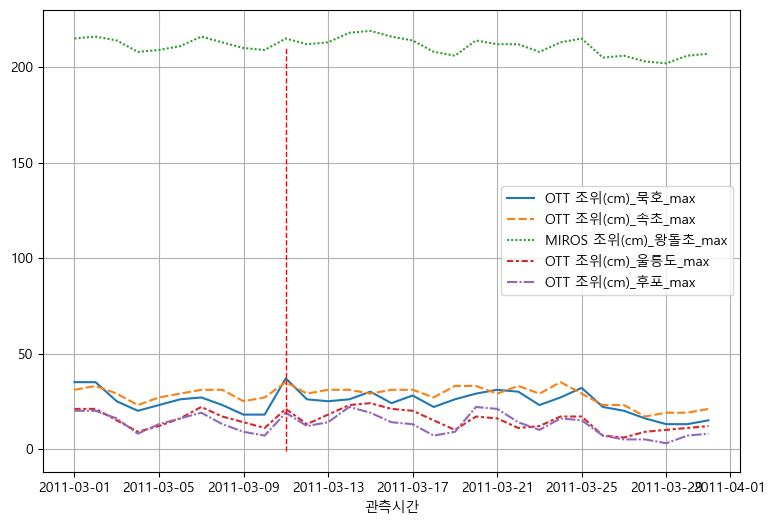

In [142]:

fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=all_stats.iloc[:, 1::3], ax=ax)

ax.vlines(x=['2011-03-11'], ymin=-1, ymax=210, colors='red', ls='--', lw=1)
ax.grid()

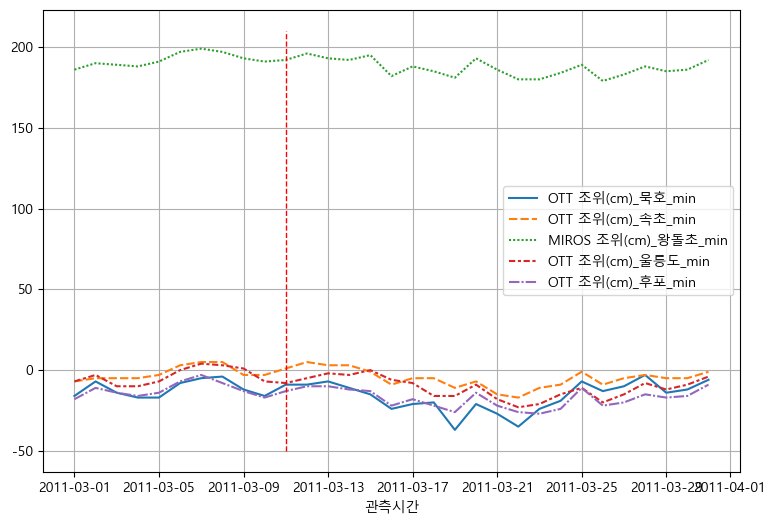

In [143]:

fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=all_stats.iloc[:, 2::3], ax=ax)

ax.vlines(x=['2011-03-11'], ymin=-50, ymax=210, colors='red', ls='--', lw=1)

ax.grid()